In [1]:
from datetime import timedelta
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from autoqml import TabularClassification
from autoqml.messages import AutoQMLFitCommand

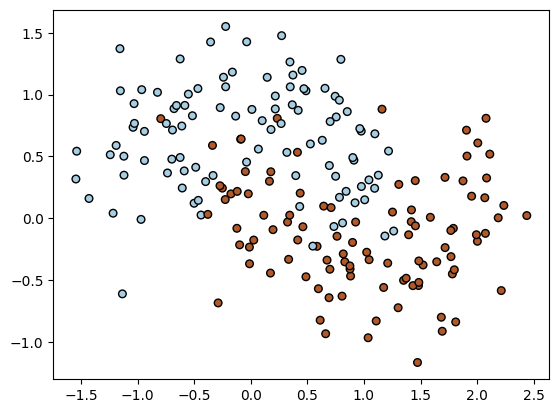

In [2]:
# Load the moon dataset and visualize the points and two classes
X, Y = make_moons(n_samples=200, noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")

In [3]:
autoqml = TabularClassification()

# Set up a basic autoqml configuration. The search space can optionally be configured manually.
# The search wil be performed for the time_budget_for_this_task seconds
cmd = AutoQMLFitCommand(
    X_train,
    y_train,
    time_budget_for_this_task=timedelta(seconds=100),
    configuration='quantum_classification',
    verbosity=1
)

In [ ]:
autoqml = autoqml.fit(cmd)

Trial start: 2025-03-26 12:06:17.287065, Trial duration: 17.392383, Trial loss: 0.07142857142857142, Method: qsvc


In [ ]:
# Print the final (best performing) pipeline
autoqml.pipeline_

TunablePipeline(steps=[('encoding',
                        EncoderChoice(estimator=CategoricalEncoder())),
                       ('rescaling',
                        RescalingChoice(estimator=MinMaxScaling(feature_range=0.6180154289988415))),
                       ('dim_reduction', DimReductionChoice(estimator=NoOp())),
                       ('rescalingQC',
                        RescalingChoiceQML(estimator=MinMaxScalingForQuantumKernel(range_factor=0.5743252488495788))),
                       ('classification',
                        ClassificationChoice(estimator=QRCClassifier(chebyshev_alpha=None,
                                                                     encoding_circuit='hubregtsen_encoding_circuit',
                                                                     ml_model='mlp',
                                                                     num_operators=None,
                                                                     num_qubits=4,
                                                                     num_repetitions=3,
                                                                     operator_seed=None,
                                                                     operators='single_paulis',
                                                                     parameter_seed=1947950989,
                                                                     trial_id='')))])

In [ ]:
y_predictions = autoqml.predict(X_test)
score = accuracy_score(y_test, y_predictions)
print("Quantum classification accuracy:", score)